In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Ảnh ban đầu

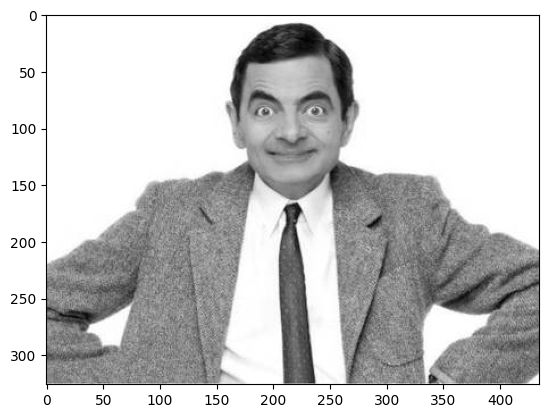

In [3]:
# Original image
# Read the image (gray mode)
img = cv.imread(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\Data\mrbean.jpg', 0)
# Show the image 
plt.imshow(img, cmap='gray')

### Mờ kiểu ô vuông (Nhảy kernel không chạm nhau)

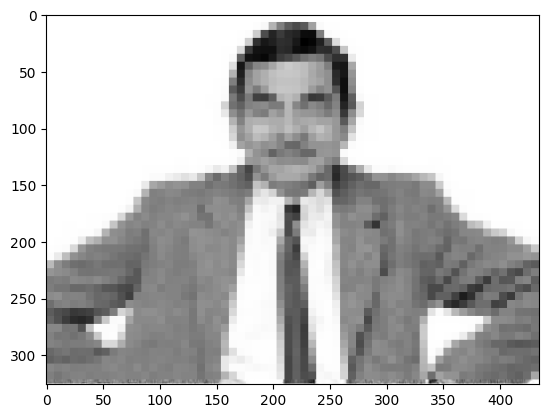

In [4]:
# Read the image (gray mode)
img = cv.imread(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\Data\mrbean.jpg', 0)

# Extract info
height, width = img.shape

# Create kernel
kernel_size = 7
kernel_half_size = 3
kernel = np.full([kernel_size, kernel_size], 1/(kernel_size**2))

# Run the kernel thought the image (no padding)
start_x, end_x = kernel_half_size, width - kernel_half_size - 1
start_y, end_y = kernel_half_size, height - kernel_half_size - 1

for i in range(start_y, end_y + 1, kernel_size):
    for j in range(start_x, end_x + 1, kernel_size):
        roi = img[i - kernel_half_size:i + kernel_half_size + 1, j - kernel_half_size:j + kernel_half_size + 1]
        roi = np.sum(roi * kernel)
        img[i - kernel_half_size:i + kernel_half_size + 1, j - kernel_half_size:j + kernel_half_size + 1] = roi   

# Show the result
plt.imshow(img, cmap='gray')


### Mờ kiểu kernel nhảy 1 đơn vị, chạy từng dòng

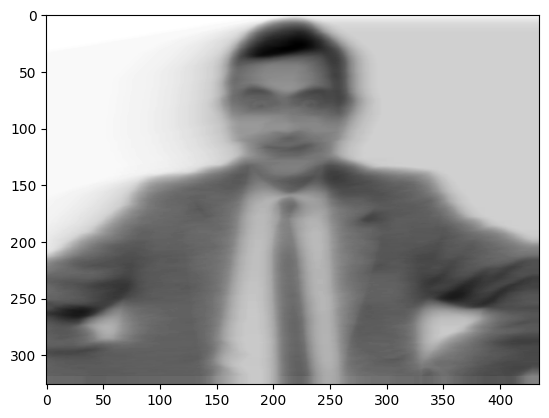

In [5]:
# Read the image (gray mode)
img = cv.imread(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\Data\mrbean.jpg', 0)

# Extract info
height, width = img.shape

# Create kernel
kernel_size = 7
kernel_half_size = 3
kernel = np.full([kernel_size, kernel_size], 1/(kernel_size**2))

# Run the kernel thought the image (no padding)
start_x, end_x = kernel_half_size, width - kernel_half_size - 1
start_y, end_y = kernel_half_size, height - kernel_half_size - 1

for i in range(start_y, end_y + 1):
    for j in range(start_x, end_x + 1):
        roi = img[i - kernel_half_size:i + kernel_half_size + 1, j - kernel_half_size:j + kernel_half_size + 1]
        roi = np.sum(roi * kernel)
        img[i - kernel_half_size:i + kernel_half_size + 1, j - kernel_half_size:j + kernel_half_size + 1] = roi   

# Show the result
plt.imshow(img, cmap='gray')

#### Như câu trên nhưng nhảy mà không ghi đè lên ảnh gốc ngay, tạo một ma trận mới với từng ô trong ma trận đó chính là kết quả tại tâm của kernel quét qua


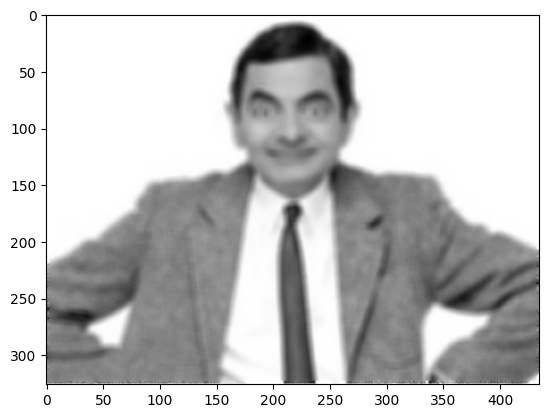

In [19]:
# Read the image (gray mode)
img = cv.imread(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\Data\mrbean.jpg', 0)

# Extract info
height, width = img.shape

# Create kernel
kernel_size = 7
kernel_half_size = 3
kernel = np.full([kernel_size, kernel_size], 1/(kernel_size**2))

# Run the kernel thought the image (no padding)
start_x, end_x = kernel_half_size, width - kernel_half_size - 1
start_y, end_y = kernel_half_size, height - kernel_half_size - 1

result_img = np.ones_like(img)

for i in range(start_y, end_y + 1):
    for j in range(start_x, end_x + 1):
        roi = img[i - kernel_half_size:i + kernel_half_size + 1, j - kernel_half_size:j + kernel_half_size + 1]
        result_img[i, j] = np.sum(roi * kernel)

# Because we dont padding, we copy the edge of the img to the result_img
for i in range(0, kernel_half_size):
    result_img[i, :] = img[i, :]
    result_img[height - 1 - i, :] = img[height - 1 - i, :]
    result_img[:, i] = img[:, i]
    result_img[:, width - 1 - i] = img[:, width - 1 - i]

# Show the result
plt.imshow(result_img, cmap='gray')

=> Perfect result

### Dùng hàm cv2

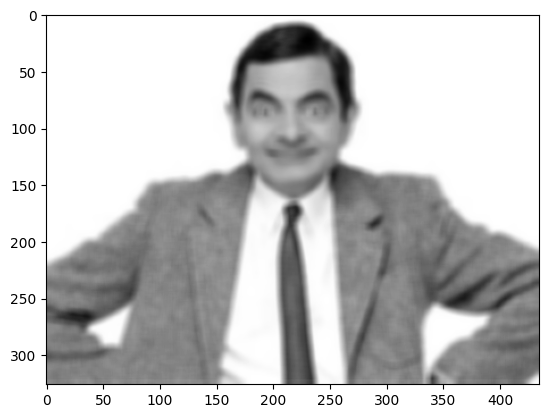

In [7]:
# Now we use cv function

# Read the image (gray mode)
img = cv.imread(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\Data\mrbean.jpg', 0)

# Extract info
height, width = img.shape

# Create kernel
kernel_size = 7
kernel_half_size = 3
kernel = np.full([kernel_size, kernel_size], 1/(kernel_size**2))

# Proccess
img = cv.filter2D(img, cv.CV_8U, kernel)

# Show the result
plt.imshow(img, cmap='gray')

### Dùng hàm cv2, mờ khuôn mặt

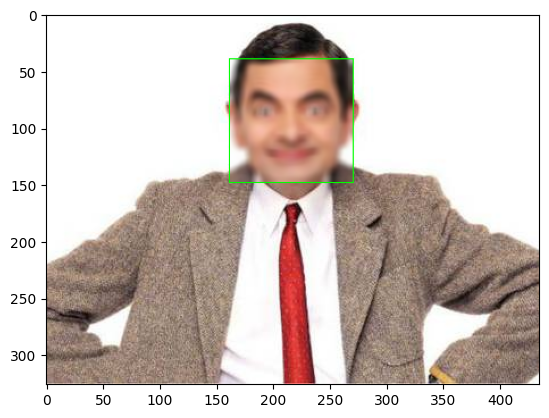

In [27]:
# Read the image (gray mode)
img = cv.imread(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\Data\mrbean.jpg')

# Extract info
height, width, _ = img.shape

# Create kernel
kernel_size = 7
kernel_half_size = 3
kernel = np.full([kernel_size, kernel_size], 1/(kernel_size**2))

# face detection setup
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# face detection
faces = face_cascade.detectMultiScale(img, 1.1, 4)

# Start the blur
for (x, y, w, h) in faces:
    roi = img[y:y+h, x:x+h]
    roi = cv.filter2D(roi, cv.CV_8U, kernel)
    img[y:y+h, x:x+h] = roi

    # Draw a rectangle border line
    cv.rectangle(img, (x, y), (x + h, y + h), (0, 255, 0), 1)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)


#### Now we use blur in real time

In [10]:
def blur_img(img):
    # Create kernel
    kernel_size = 5
    kernel_half_size = 2
    kernel = np.full((kernel_size, kernel_size), 1/(kernel_size**2))

    # Start the bluring
    img = cv.filter2D(img, cv.CV_8U, kernel)

    return img

def get_faces(img):
    # Initalize face cascade
    face_cascade = cv.CascadeClassifier(r'E:\New Project\Math-for-AI\Probability and statistics\Working with image\Use mean to blur image\haarcascade_frontalface_default.xml')

    # Detect face
    faces = face_cascade.detectMultiScale(img)

    return faces

def blur_faces(img):
    faces = get_faces(img)
    for (x, y, w, h) in faces:
        roi = img[y:y+h, x:x+w]
        roi = blur_img(roi)
        img[y:y+h, x:x+w] = roi

        # Draw rectangle border line
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

    return img

def run_webcam():
    # initialize the camera
    cap = cv.VideoCapture(0)

    if not cap:
        print("Error: Could not open camera.")
        exit()

    # Capture frame in loop
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            exit()

        frame = blur_faces(frame)
        cv.imshow('frame', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera
    cap.release()
    cv.destroyAllWindows()

In [11]:
run_webcam()